
**Muchammad \
 \
** 

* Skema Data Science

# Data Understanding

1. Tahap data understanding:
                - Lakukan telaah data dengan metode statistik dan sertakan hasilnya.
                - Lakukan telaah data dengan metode visualisasi, sertakan minimal 2 grafik
                hasil telaah data dan hasil telaah atau analisanya.
---

In [5]:
# import Lybrary

import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [6]:
df = pd.read_csv("dataset_tugas_mandiri_segmentasi_customer_pert4.csv")
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0.0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1.0,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0.0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0.0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0.0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1.0,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1.0,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0.0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0.0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1.0,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [7]:
# mengecek nilai null yang ada
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status         40
Income                 24
Kidhome                 0
Teenhome               57
Dt_Customer            39
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# melihat tipe data
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome               float64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [9]:
# menampilkan ringkasan Statistik
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2183.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.504810,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544828,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Mendeteksi Outlier dengan Metode *Tukeys Fences*
---

In [10]:
# Mencari kuartil pertama (Q1)
q1 = df.quantile(0.25, numeric_only=True)
print("Q1 (25%) data")
print("-" * 33)
q1

Q1 (25%) data
---------------------------------


ID                      2828.25
Year_Birth              1959.00
Income                 35303.00
Kidhome                    0.00
Teenhome                   0.00
Recency                   24.00
MntWines                  23.75
MntFruits                  1.00
MntMeatProducts           16.00
MntFishProducts            3.00
MntSweetProducts           1.00
MntGoldProds               9.00
NumDealsPurchases          1.00
NumWebPurchases            2.00
NumCatalogPurchases        0.00
NumStorePurchases          3.00
NumWebVisitsMonth          3.00
AcceptedCmp3               0.00
AcceptedCmp4               0.00
AcceptedCmp5               0.00
AcceptedCmp1               0.00
AcceptedCmp2               0.00
Complain                   0.00
Z_CostContact              3.00
Z_Revenue                 11.00
Response                   0.00
Name: 0.25, dtype: float64

In [11]:
# Mencari kuartil ketiga (Q3)
q3 = df.quantile(0.75, numeric_only=True)
print("Q3 (75%) data")
print("-" * 30)
q3

Q3 (75%) data
------------------------------


ID                      8427.75
Year_Birth              1977.00
Income                 68522.00
Kidhome                    1.00
Teenhome                   1.00
Recency                   74.00
MntWines                 504.25
MntFruits                 33.00
MntMeatProducts          232.00
MntFishProducts           50.00
MntSweetProducts          33.00
MntGoldProds              56.00
NumDealsPurchases          3.00
NumWebPurchases            6.00
NumCatalogPurchases        4.00
NumStorePurchases          8.00
NumWebVisitsMonth          7.00
AcceptedCmp3               0.00
AcceptedCmp4               0.00
AcceptedCmp5               0.00
AcceptedCmp1               0.00
AcceptedCmp2               0.00
Complain                   0.00
Z_CostContact              3.00
Z_Revenue                 11.00
Response                   0.00
Name: 0.75, dtype: float64

In [12]:
# Menghitung Interquartile Range (IQR)
iqr = q3-q1
print("Interquartile Range (IQR) data")
print("-" * 33)

iqr

Interquartile Range (IQR) data
---------------------------------


ID                      5599.5
Year_Birth                18.0
Income                 33219.0
Kidhome                    1.0
Teenhome                   1.0
Recency                   50.0
MntWines                 480.5
MntFruits                 32.0
MntMeatProducts          216.0
MntFishProducts           47.0
MntSweetProducts          32.0
MntGoldProds              47.0
NumDealsPurchases          2.0
NumWebPurchases            4.0
NumCatalogPurchases        4.0
NumStorePurchases          5.0
NumWebVisitsMonth          4.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Z_CostContact              0.0
Z_Revenue                  0.0
Response                   0.0
dtype: float64

In [13]:
# Mencari batas bawah
batas_bawah = q1 - (1.5 * iqr)
batas_bawah

ID                     -5571.0
Year_Birth              1932.0
Income                -14525.5
Kidhome                   -1.5
Teenhome                  -1.5
Recency                  -51.0
MntWines                -697.0
MntFruits                -47.0
MntMeatProducts         -308.0
MntFishProducts          -67.5
MntSweetProducts         -47.0
MntGoldProds             -61.5
NumDealsPurchases         -2.0
NumWebPurchases           -4.0
NumCatalogPurchases       -6.0
NumStorePurchases         -4.5
NumWebVisitsMonth         -3.0
AcceptedCmp3               0.0
AcceptedCmp4               0.0
AcceptedCmp5               0.0
AcceptedCmp1               0.0
AcceptedCmp2               0.0
Complain                   0.0
Z_CostContact              3.0
Z_Revenue                 11.0
Response                   0.0
dtype: float64

In [14]:
# Mencari batas atas
batas_atas = q3 + (1.5 * iqr)
batas_atas

ID                      16827.0
Year_Birth               2004.0
Income                 118350.5
Kidhome                     2.5
Teenhome                    2.5
Recency                   149.0
MntWines                 1225.0
MntFruits                  81.0
MntMeatProducts           556.0
MntFishProducts           120.5
MntSweetProducts           81.0
MntGoldProds              126.5
NumDealsPurchases           6.0
NumWebPurchases            12.0
NumCatalogPurchases        10.0
NumStorePurchases          15.5
NumWebVisitsMonth          13.0
AcceptedCmp3                0.0
AcceptedCmp4                0.0
AcceptedCmp5                0.0
AcceptedCmp1                0.0
AcceptedCmp2                0.0
Complain                    0.0
Z_CostContact               3.0
Z_Revenue                  11.0
Response                    0.0
dtype: float64

In [15]:
# Memilih kolom yang bertipe data angka
numeric_data = df.select_dtypes(exclude="object")
numeric_data

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,58138.0,0,0.0,58,635,88,546,172,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,46344.0,1,1.0,38,11,1,6,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,71613.0,0,0.0,26,426,49,127,111,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,26646.0,1,0.0,26,11,4,20,10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,58293.0,1,0.0,94,173,43,118,46,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,61223.0,0,1.0,46,709,43,182,42,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,64014.0,2,1.0,56,406,0,30,0,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,56981.0,0,0.0,91,908,48,217,32,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,69245.0,0,1.0,8,428,30,214,80,...,3,0,0,0,0,0,0,3,11,0


In [16]:
# Melakukan filter pada outliers
outlier_filter = (numeric_data < batas_bawah) | (numeric_data > batas_atas)
outlier_filter

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
# Menampilkan persentase outliers pada setiap kolom
num_data_length = len(numeric_data)
for col in outlier_filter.columns:
    outliers_count = outlier_filter[col][outlier_filter[col] == True].count()
    percentage_outliers = outliers_count / num_data_length * 100
    formatted_percentage_outliers = "{:,.2f}%".format(percentage_outliers)
    print(f"Persentase Outliers pada Kolom {col}")
    print(formatted_percentage_outliers)
    print("-" * 33)

Persentase Outliers pada Kolom ID
0.00%
---------------------------------
Persentase Outliers pada Kolom Year_Birth
0.13%
---------------------------------
Persentase Outliers pada Kolom Income
0.36%
---------------------------------
Persentase Outliers pada Kolom Kidhome
0.00%
---------------------------------
Persentase Outliers pada Kolom Teenhome
0.00%
---------------------------------
Persentase Outliers pada Kolom Recency
0.00%
---------------------------------
Persentase Outliers pada Kolom MntWines
1.56%
---------------------------------
Persentase Outliers pada Kolom MntFruits
10.13%
---------------------------------
Persentase Outliers pada Kolom MntMeatProducts
7.81%
---------------------------------
Persentase Outliers pada Kolom MntFishProducts
9.96%
---------------------------------
Persentase Outliers pada Kolom MntSweetProducts
11.07%
---------------------------------
Persentase Outliers pada Kolom MntGoldProds
9.24%
---------------------------------
Persentase Outliers

### Visualisasi Outlier menggunakan 2 Grafik
        1. Histogram
        2. Heatmap
---

In [18]:
!pip install plotly

In [19]:
# Melihat distribusi data dengan histogram
import plotly.express as px
for col in numeric_data.columns :
    fig = px.histogram(numeric_data, x=numeric_data[col], title=f"{col} Histogram")
    fig.show(renderer='jupyterlab')

In [20]:
# Melihat korelasi antara kolom
df_corr = df.corr(numeric_only=True)
df_corr

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,1.000000,0.000028,0.013095,0.002406,0.004321,-0.046524,-0.022878,0.004600,-0.004437,-0.024475,...,-0.007446,-0.036040,-0.025387,-0.007517,-0.021614,-0.015061,0.033883,NaN,NaN,-0.021968
Year_Birth,0.000028,1.000000,-0.161791,0.230176,-0.348389,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,0.013095,-0.161791,1.000000,-0.428669,0.020271,-0.003970,0.578650,0.430842,0.584633,0.438871,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.002406,0.230176,-0.428669,1.000000,-0.040188,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,0.004321,-0.348389,0.020271,-0.040188,1.000000,0.014736,0.006998,-0.178478,-0.260571,-0.202763,...,0.134885,-0.042712,0.039210,-0.190713,-0.137465,-0.015490,0.003438,NaN,NaN,-0.150349
Recency,-0.046524,-0.019871,-0.003970,0.008827,0.014736,1.000000,0.016064,-0.004306,0.023056,0.001079,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.022878,-0.157773,0.578650,-0.496297,0.006998,0.016064,1.000000,0.389637,0.562667,0.399753,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,0.004600,-0.017917,0.430842,-0.372581,-0.178478,-0.004306,0.389637,1.000000,0.543105,0.594804,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.004437,-0.030872,0.584633,-0.437129,-0.260571,0.023056,0.562667,0.543105,1.000000,0.568402,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.024475,-0.041625,0.438871,-0.387644,-0.202763,0.001079,0.399753,0.594804,0.568402,1.000000,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331


In [21]:
# Melihat korelasi dengan Heatmap
fig = px.imshow(df_corr, text_auto=True, aspect='Auto', width=1100, height=1000)
fig.show(renderer='jupyterlab')

In [22]:
# melihat korelasi menggunakan Boxplot
import plotly.express as px
for col in numeric_data.columns :
    fig = px.box(numeric_data, y=numeric_data[col], title=f"{col} Boxplot")
    fig.show(renderer='jupyterlab')

---
# Data Preparation
 
 2. Tahap data preparation:
            Sertakan alasan dan penjelasan dari metode yang dipilih dalam proses data preparation.
                - Metode penyesuaian kolom atau field data.
                - Metode imputasi data
                - Metode data scaling
                - Metode pelabelan data
                - Metode penaganan outliers


In [23]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0.0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1.0,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0.0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0.0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0.0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1.0,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1.0,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0.0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0.0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1.0,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [24]:
df = df.drop(["ID","Year_Birth","Dt_Customer"], axis=1)

In [25]:
df.isnull().sum()

Education               0
Marital_Status         40
Income                 24
Kidhome                 0
Teenhome               57
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [26]:
# Imputasi dengan metode mean / median
income_mean = df['Income'].mean()
income_median = df['Income'].median()

print("Nilai rata-rata dari kolom Income :", income_mean)
print("Nilai median dari kolom Income :", income_median)

# Melakukan imputasi pada kolom Income dengan metode imputasi mean
df['Income'].fillna(income_mean, inplace=True)

Nilai rata-rata dari kolom Income : 52247.25135379061
Nilai median dari kolom Income : 51381.5


In [27]:
# MeLakukan imputasi dengan metode median pada kolom Marital_Status, Teenhome
imputKolom = ("Marital_Status", "Teenhome")

# Mengisi nilai N/A pada kolom Marital_Status dengan modus
for i in imputKolom:
    df[i] = df[i].fillna(df[i].mode()[0])

Dengan menggunakan 2 metode diatas maka sudah tidak ada lagi nilai NULL yang tersisa

### Mengatasi Outlier

In [28]:
# Mengatasi Outliers
df_num_only = df.select_dtypes(exclude='object')

# Deteksi Outliers (Tukey's Fences)
q1 = df_num_only.quantile (0.25)
q3 = df_num_only.quantile (0.75)
iqr = q3-q1

batas_atas = q3 + (1.5 * iqr)
batas_bawah = q1 - (1.5 * iqr)

outlier_filter = (df_num_only < batas_bawah) | (df_num_only > batas_atas)
outlier_filter

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,False,False,False,False,False,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2237,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Mendapatkan kolom yang memiliki outliers
columns_with_outliers = []

for col in outlier_filter.columns:
    if True in outlier_filter[col].unique():
        columns_with_outliers.append(col)

columns_with_outliers

['Income',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

In [30]:
# Melakukan winsorization pada kolom dengan outliers

# Memilih kolom yang outliers-nya akan dilakukan winsorization
columns_with_outliers = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Melakukan winsorization pada kolom yang memiliki outliers
from scipy.stats.mstats import winsorize

# Melakukan winsorize pada kolom yang memiliki outliers
for col in columns_with_outliers:
    # Mengatur batas atas dari winsorization menjadi 5%
    df[col] = winsorize(df[col], limits=[0, 0.05])

In [31]:
# Melihat distribusi data dan outliers dengan 'boxplot' setelah dilakukan winsorizze

for col in columns_with_outliers :
  # code here
    fig = px.box(df_num_only, y=df_num_only[col], title=f"{col} Boxplot")
    fig.update_layout(height= 500, width = 500)
    fig.show(renderer='jupyterlab')

### Data Scaling

In [32]:
numerical_col = df.select_dtypes(exclude='object').columns.tolist()
numerical_col

['Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [33]:
# Membuat objek scaler
scaler = StandardScaler()

# Melakukan Scaling
df[numerical_col] = scaler.fit_transform(df[numerical_col])
df[numerical_col]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0.330507,-0.825218,-0.905057,0.307039,1.081399,1.814229,1.948623,2.706622,1.738326,0.990970,...,0.693904,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,2.388846
1,-0.254963,1.032559,0.934624,-0.383664,-0.904942,-0.682184,-0.770223,-0.688331,-0.678920,-0.781269,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2,0.999424,-0.825218,-0.905057,-0.798086,0.416102,0.695147,-0.161000,1.540885,-0.123231,-0.003213,...,-0.542647,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
3,-1.232799,1.032559,-0.905057,-0.798086,-0.904942,-0.596100,-0.699734,-0.524719,-0.623351,-0.802882,...,0.281720,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
4,0.338201,1.032559,-0.905057,1.550305,-0.389257,0.522981,-0.206314,0.211536,0.043475,-0.586755,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.483651,-0.825218,0.934624,-0.107383,1.316958,0.522981,0.115920,0.129730,2.571860,2.655145,...,-0.130463,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2236,0.622200,2.890335,0.934624,0.237969,0.352437,-0.710878,-0.649385,-0.729234,-0.706705,-0.738044,...,0.693904,-0.28014,-0.283830,-0.28014,3.815174,-0.11651,-0.097282,0.0,0.0,-0.418612
2237,0.273072,-0.825218,-0.905057,1.446700,1.950423,0.666453,0.292141,-0.074785,-0.373291,-0.392241,...,0.281720,-0.28014,3.523233,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612
2238,0.881874,-0.825218,0.934624,-1.419719,0.422468,0.149954,0.277036,0.906888,0.126829,0.407428,...,-0.954831,-0.28014,-0.283830,-0.28014,-0.262111,-0.11651,-0.097282,0.0,0.0,-0.418612


### Label Encoding

In [34]:
# Mengambil kolom dengan tipe data objek untuk dilakukan label encoding
df_num_only = df.select_dtypes(exclude='object')
object_col = df_num_only.columns.tolist()
object_col

le = LabelEncoder()
df[object_col] = df[object_col].apply(le.fit_transform)

In [35]:
# Melakukan label encoding pada kolom "Education" dan "Marital Status" agar dapat melakukan reduksi PCA
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

# Modelling Data

3. Tahap data modelling
            Sertakan alasan dan penjelasan:
                - Ukuran dimensi yang dipilih untuk direduksi
                - Nilai K terbaik yang dipilih untuk melakukan pelatihan model
                - Pola cluster yang terbentuk

In [36]:
# Menerapkan PCA
pca = PCA()
df_pca = pca.fit_transform(df_num_only)

In [37]:
# Menghitung kumulatif dari rasio varians
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Menentukan jumlah komponen utama yang diperlukan untuk menjelaskan setidaknya 85% dari total varians
n_components = np.argmax(cumulative_variance_ratio >= 0.85) + 1

#  Mengecek kumulatif dari rasio varians
cumulative_variance_ratio

array([0.31639386, 0.40306001, 0.48875933, 0.55005782, 0.59678239,
       0.64192981, 0.68440565, 0.72178071, 0.75458305, 0.78483831,
       0.81184924, 0.83838432, 0.86424951, 0.88944983, 0.90912142,
       0.92701863, 0.94422994, 0.95996585, 0.97434613, 0.98501958,
       0.99361745, 1.        , 1.        , 1.        ])

In [38]:
# Mengecek jumlah minimal komponen utama
n = n_components
n

13

In [39]:
cumulative_variance_ratio[n]

0.8894498326112505

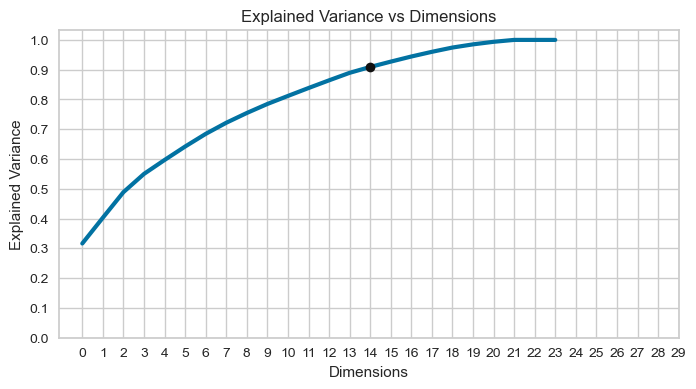

In [40]:
plt.figure(figsize = (8, 4))
plt.plot(cumulative_variance_ratio, linewidth=3)
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.title("Explained Variance vs Dimensions")
plt.plot(14, cumulative_variance_ratio[14], "ko")
plt.xticks(np.arange(0, 30, 1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)

plt.show()

In [41]:
pca = PCA(n_components = n, random_state = 42, svd_solver = 'full')
pca.fit(df)
df_reduced = pd.DataFrame(pca.transform(df), columns = (['col1', 'col2', 'col3', 'col4',
                                                                  'col5', 'col6', 'col7', 'col8',
                                                                  'col9', 'col10', 'col11', 'col12',
                                                                  'col13']))

In [42]:
df_reduced.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13
0,330.584252,-239.380474,209.251134,36.183067,46.511990,-8.138413,-17.773179,-1.190479,0.209241,6.188313,2.570620,-1.815029,-1.402720
1,-234.211254,181.493571,-60.602079,-17.695547,-3.181632,9.913824,-1.122147,0.322252,-1.836932,0.972376,0.764302,0.555991,0.070806
2,591.235760,83.550794,-102.650700,18.308974,40.355365,22.538910,-42.193942,-15.702484,2.542969,-1.042425,-2.656815,-1.240831,0.656603
3,-779.085536,-26.753142,34.553609,-11.023466,9.789575,22.511843,-2.030050,0.374926,-0.308400,-1.404127,-0.268309,-0.254355,0.666375
4,155.416836,142.849844,-20.769397,-9.806357,22.007973,-46.480994,-6.045812,-16.078750,3.042137,0.943851,2.009752,0.556013,0.608317


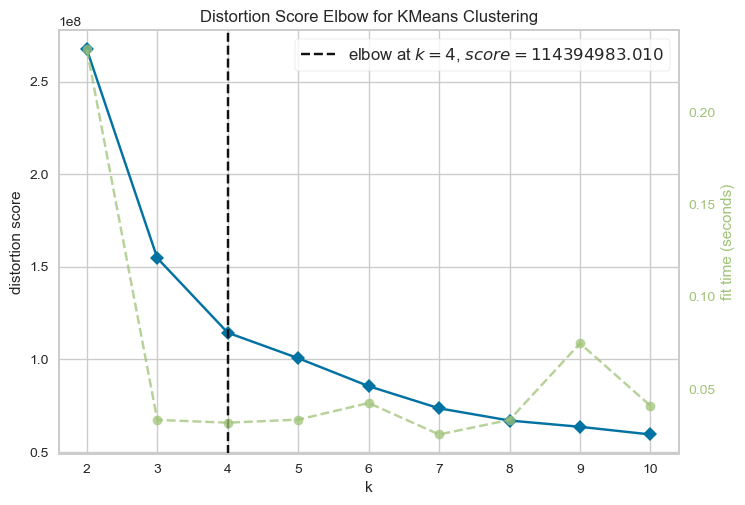

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
elbow = KElbowVisualizer(KMeans(n_init='auto'), k = 10)
elbow.fit(df_reduced)
elbow.show()

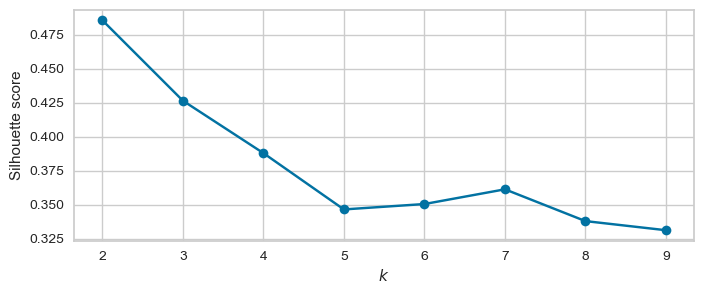

In [44]:
kmeans_per_k = [KMeans(n_clusters=k, n_init='auto', random_state=42).fit(df)
                for k in range(2, 11)]

silhouette_scores = [silhouette_score(df_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")

plt.grid(True)

plt.show()

In [45]:
# Mencetak Silhouette Score Untuk Setiap K / Cluster
cluster_range = range(2, 10)
for i, score in zip(cluster_range, silhouette_scores):
  print(f"Silhouette Score untuk {i} K / Cluster :", score)

Silhouette Score untuk 2 K / Cluster : 0.48554452701009826
Silhouette Score untuk 3 K / Cluster : 0.4264207517496974
Silhouette Score untuk 4 K / Cluster : 0.38790178402657616
Silhouette Score untuk 5 K / Cluster : 0.34651210017724043
Silhouette Score untuk 6 K / Cluster : 0.3504819006888337
Silhouette Score untuk 7 K / Cluster : 0.36129801027336056
Silhouette Score untuk 8 K / Cluster : 0.33793527412984603
Silhouette Score untuk 9 K / Cluster : 0.33123626389287414


Dapat dilihat bahwa silhouette score paling tinggi dimiliki oleh K = 2 Cluster

In [46]:
df1 = df_reduced
df1.head()

,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13
0,330.584252,-239.380474,209.251134,36.183067,46.511990,-8.138413,-17.773179,-1.190479,0.209241,6.188313,2.570620,-1.815029,-1.402720
1,-234.211254,181.493571,-60.602079,-17.695547,-3.181632,9.913824,-1.122147,0.322252,-1.836932,0.972376,0.764302,0.555991,0.070806
2,591.235760,83.550794,-102.650700,18.308974,40.355365,22.538910,-42.193942,-15.702484,2.542969,-1.042425,-2.656815,-1.240831,0.656603
3,-779.085536,-26.753142,34.553609,-11.023466,9.789575,22.511843,-2.030050,0.374926,-0.308400,-1.404127,-0.268309,-0.254355,0.666375
4,155.416836,142.849844,-20.769397,-9.806357,22.007973,-46.480994,-6.045812,-16.078750,3.042137,0.943851,2.009752,0.556013,0.608317


In [47]:
# Membuat dan Melatih Model K-Means
kmeans_model = KMeans(n_clusters = 2,random_state=42, n_init='auto',max_iter=300)
kmeans_model.fit(df_pca)

KMeans(n_clusters=2, n_init='auto', random_state=42)

In [48]:
# Menambahkan Label Klaster ke DataFrame
df1['cluster'] = kmeans_model.labels_
df2 = df1

In [49]:
scaler1 = StandardScaler()
normalized_data = df1.drop(columns=['cluster'])
normalized_data = scaler1.fit_transform(df2)

In [50]:
# PCA untuk Reduksi Dimensi
pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)
df2['PC1'] = pca_data[:, 0]
df2['PC2'] = pca_data[:, 1]

In [51]:
# Mengatur Palet Warna untuk Klaster:
cluster_palette = sns.color_palette("Set2", n_colors=len(df2['cluster'].unique()))

### Kmeans Cluster

In [52]:
kmeans_model.cluster_centers_[:, 0]

array([-1.90066713,  2.87230863])

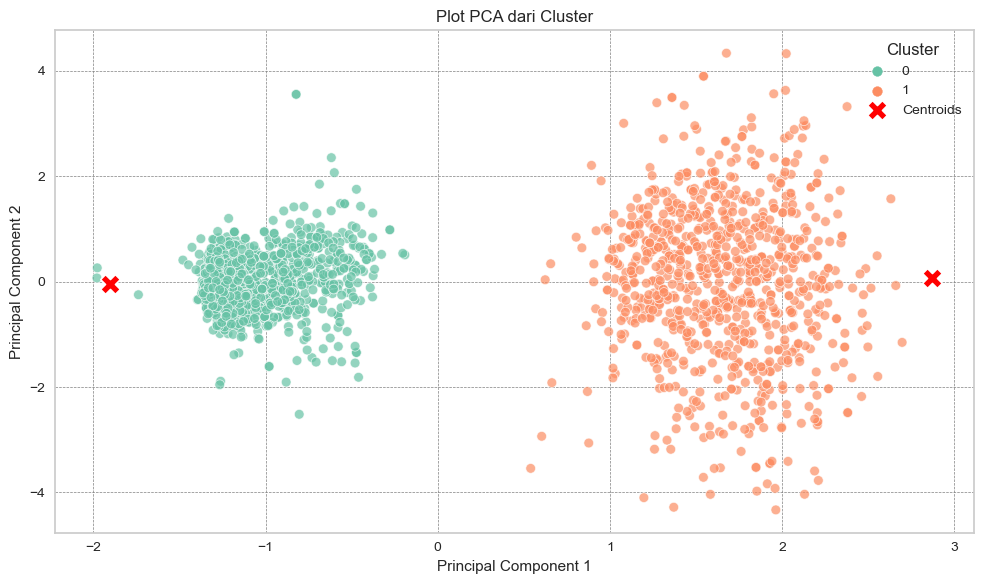

In [53]:
# Membuat Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='PC1', y='PC2', hue='cluster', palette=cluster_palette, alpha=0.7)

plt.title("Plot PCA dari Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

sns.scatterplot(x=kmeans_model.cluster_centers_[:, 0], y=kmeans_model.cluster_centers_[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.legend(title='Cluster')
plt.show()


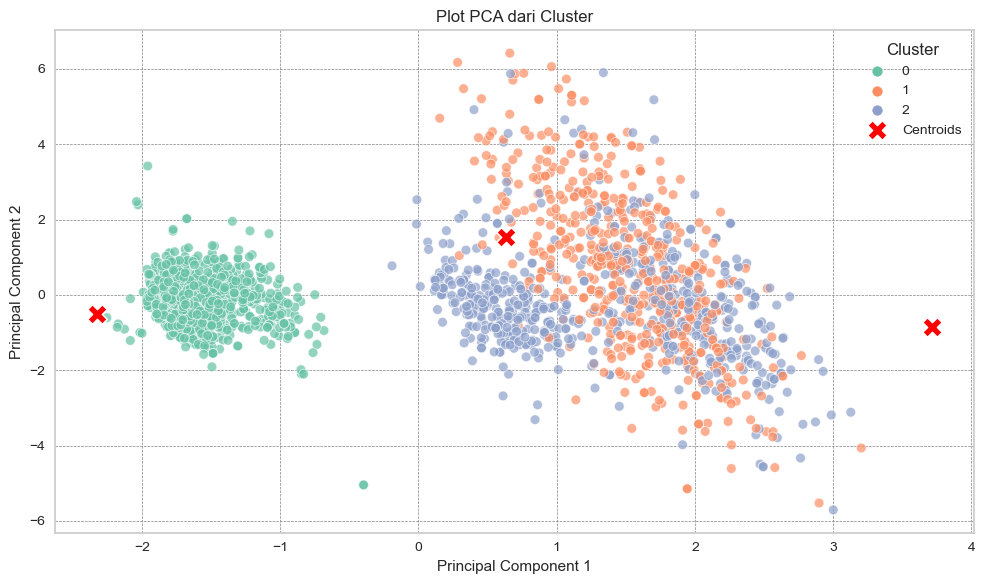

In [54]:
kmeans_model = KMeans(n_clusters = 3,random_state=42, n_init='auto',max_iter=300)
kmeans_model.fit(df_pca)

df1['cluster'] = kmeans_model.labels_
df2 = df1

scaler1 = StandardScaler()
normalized_data = scaler1.fit_transform(df2)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(normalized_data)

df2['PC1'] = pca_data[:, 0]
df2['PC2'] = pca_data[:, 1]


cluster_palette = sns.color_palette("Set2", n_colors = len(df2['cluster'].unique()))

plt.figure(figsize = (10, 6))

sns.scatterplot(data=df2, x='PC1', y='PC2', hue = 'cluster', palette = cluster_palette, alpha = 0.7)

plt.title("Plot PCA dari Cluster")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.grid(True)
plt.tight_layout()


plt.legend(title="Cluster", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

sns.scatterplot(x = kmeans_model.cluster_centers_[:,0], y = kmeans_model.cluster_centers_[:,1], marker = 'X', s = 200, color = 'red', label = 'Centroids')
plt.legend(title = 'Cluster')


plt.show()

In [55]:
# Membuat dan Melatih Model K-Means
kmeans_model = KMeans(n_clusters = 2,random_state=42, n_init='auto',max_iter=300)
kmeans_model.fit(df_pca)

df1['cluster'] = kmeans_model.labels_

In [56]:
# Menghitung distribusi kluster
cluster_distribution = df1['cluster'].value_counts().sort_index()

# Mengubah distribusi kluster menjadi DataFrame
cluster_distribution_df = pd.DataFrame({'cluster': cluster_distribution.index, 'count': cluster_distribution.values})

In [57]:
# Melihat distribusi data masing-masing cluster
fig = px.bar(cluster_distribution_df, x="cluster", y="count")
fig.show(renderer='jupyterlab')

In [58]:
# Kid Home vs TeenHome dilihat dari Cluster
fig = px.scatter(df2, x='col8', y='col10', color='cluster', symbol='cluster', title='Fruit vs Fish Product by Cluster')
fig.update(layout_coloraxis_showscale=False)
fig.show(renderer='jupyterlab')

Dapat disimpulkan dari scatter plot di atas bahwa pola cluster adalah sebagai berikut:
- Cluster 0 : Customer dengan membeli ikan terbanyak, namun wine rendah
- Cluster 1 : Customer dengan membeli wine terbanyak namun fish ternedah